Filename is pcc_resnet50_X.h5 (where X is model number)


In [1]:
from keras.models import load_model
# from keras.preprocessing import image
# import keras.utils as image
# from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
import seaborn as sns

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from PIL import Image


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    From scikit-learn: plots a confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #fixes "squishing of plot"
    plt.ylim([1.5, -.5]) 
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()


https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras

In [3]:
# testDir = 'clean-flags-big-sweep'
# testImgs = glob.glob(os.path.join(testDir, '*.png'))
# img_width, img_height = 200, 200

# predictions = []

# for ind, im in enumerate(testImgs):
# #     print(ind, im)
# #     imPaths.append(im)
#     img = image.load_img(im, target_size=(img_width, img_height))
#     x = image.img_to_array(img)
#     ex = np.expand_dims(x, axis = 0)
#     images = np.vstack([ex])
    
#     pred = cnn_model.predict(ex)
#     pred = np.argmax(pred, axis = 1)
#     predictions.append(pred[0])
    
# #     if ind > 4:
# #         break

In [4]:
# mkdir bigSweepPredictions

In [5]:
# predictDir = 'bigSweepPredictions'

# for ind, im in enumerate(testImgs):
    
#     img = image.load_img(im, target_size=(img_width, img_height))
    
#     plt.figure()
#     plt.imshow(img)
#     plt.title(f'Predicted as {predictions[ind]}')
    
#     basename = os.path.basename(im)
#     filename = os.path.join(predictDir, f'{str(basename[:-4])}_label={str(predictions[ind])}')
# #     print(filename)
#     plt.savefig(f'{filename}.png')
#     plt.close()

In [6]:
# join on specObj to see if missmatch b/t PhotoObj type and SpecObj type
# also want to see if objects in PCC appear

radialSearchSpec = f'SELECT TOP 300 p.objID, p.ra, p.dec, \
 p.modelMag_r, \
 p.modelMag_u - p.modelMag_g as u_g, \
 p.modelMag_g - p.modelMag_z as g_z, \
 p.modelMag_g - p.modelMag_r as g_r, \
 p.modelMag_g - p.modelMag_i as g_i, \
 p.modelMag_r - p.modelMag_i as r_i, \
 p.modelMag_r - p.modelMag_z as r_z, \
 p.petroRad_r, p.flags, dbo.fPhotoFlagsN(p.flags) as flag_text, \
 s.specObjID, s.z, s.zErr, s.zWarning, s.class, s.subClass, \
 N.distance \
FROM\
 photoObj as p \
JOIN SpecObjAll s ON p.objID = s.bestObjID \
JOIN dbo.fGetNearbyObjEq(49.9467, 41.5131, 45) as N ON N.objID = p.objID \
WHERE \
 p.modelMag_r > -14.3*(p.modelMag_g - p.modelMag_z) + 37 \
 and p.modelMag_r < -14.3*(p.modelMag_g - p.modelMag_z) + 46 \
 and p.type = 3 \
ORDER BY distance'

radDf = CasJobs.executeQuery(radialSearchSpec, "dr16")
# radDf

(array([16.,  0.,  0., 17., 52., 45., 24., 10.,  6.,  0.,  0.,  1.,  0.,
         0.,  3.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         3.]),
 array([-0.00039393,  0.00301646,  0.00642685,  0.00983724,  0.01324763,
         0.01665802,  0.02006841,  0.0234788 ,  0.02688919,  0.03029959,
         0.03370998,  0.03712037,  0.04053076,  0.04394115,  0.04735154,
         0.05076193,  0.05417232,  0.05758271,  0.0609931 ,  0.06440349,
         0.06781388,  0.07122427,  0.07463467,  0.07804506,  0.08145545,
         0.08486584,  0.08827623,  0.09168662,  0.09509701,  0.0985074 ,
         0.10191779,  0.10532818,  0.10873857,  0.11214896,  0.11555936,
         0.11896975,  0.12238014,  0.12579053,  0.12920092,  0.13261131,
         0.1360217 ]),
 <BarContainer object of 40 artists>)

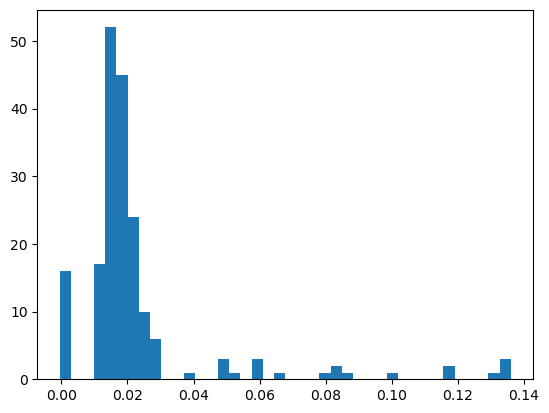

In [7]:
plt.hist(radDf['z'], bins = 40)

Cluster member redshift range 0.01 < spec-z < 0.033 \
Stars spec-z < 0.01 \
Background spec-z > 0.033

In [8]:
def labeler(num):
    if num > 0.033:
        return(0) # background
        
    else:
        return(1) # members
        

# def labeler(num):
#     if num > 0.033:
#         return(0) # background
        
#     elif num > 0.01 and num < 0.033:
#         return(1) # members
        
#     else:
#         return(2) # stars

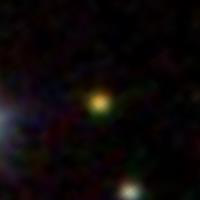

In [9]:
SkyServer_DataRelease = 'DR16'
img_width, img_height = 200, 200
# img_array = SkyServer.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=200, height=200, scale=0.1, 
#                                  dataRelease=SkyServer_DataRelease)
img_array = SkyServer.getJpegImgCutout(ra=49.9955, dec=41.2136, width=200, height=200, scale=0.1, 
                                 dataRelease=SkyServer_DataRelease)

# outPicTemplate = f'{}'
img0 = Image.fromarray(img_array, 'RGB')
# img0.save(f'{outDir}/.png')
img0


In [10]:
# rm -rf /Radial-Search-2_2024
# radDf.sort_values(by=['modelMag_r'])
# threshold for the r-band -- the lower the brighter
rmag_threshold = 17.3
faint = np.where(radDf['modelMag_r'] >= rmag_threshold)
faintDf = radDf.iloc[faint].copy()
faintDf.sort_values(by = ['modelMag_r'])


,objID,ra,dec,modelMag_r,u_g,g_z,g_r,g_i,r_i,r_z,petroRad_r,flags,flag_text,specObjID,z,zErr,zWarning,class,subClass,distance
173,1237661083199079335,49.084806,41.332288,17.37789,2.232409,1.990122,1.119343,1.591516,0.472174,0.870779,2.748656,35253360136240,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP CO...,1875833957375830016,0.118796,0.000018,0,GALAXY,,40.266207
65,1237670960021505209,50.036431,41.774622,17.46084,1.745869,1.446409,0.860964,1.233713,0.372749,0.585445,1.572295,35221147881488,DEBLENDED_AT_EDGE BAD_MOVING_FIT MOVED BINNED1...,1875901852218845184,-0.000041,0.000008,0,STAR,K3,16.198894
136,1237661055281594523,49.258329,41.632948,17.49508,1.959175,1.781338,1.047070,1.510738,0.463669,0.734268,1.561496,35184675258384,DEBLENDED_AT_EDGE BINNED1 DEBLENDED_AS_PSF SUB...,1875870241259546624,0.012355,0.000009,0,GALAXY,BROADLINE,31.724274
137,1237661055281594523,49.258329,41.632948,17.49508,1.959175,1.781338,1.047070,1.510738,0.463669,0.734268,1.561496,35184675258384,DEBLENDED_AT_EDGE BINNED1 DEBLENDED_AS_PSF SUB...,1874743241589417984,0.012394,0.000008,0,GALAXY,,31.724274
118,1237661083199144825,49.359348,41.335516,17.55119,1.983553,1.814596,0.970749,1.433880,0.463131,0.843847,2.918860,35253360132112,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP CH...,1875825161282807808,0.059228,0.000018,0,GALAXY,,28.492077
147,1237661083199079629,49.247517,41.325886,17.59249,1.558619,1.804649,0.975758,1.498127,0.522369,0.828892,3.375067,35255507485200,DEBLENDED_AT_EDGE STATIONARY MOVED BINNED1 MAN...,1874698161612679168,0.131947,0.000006,0,GALAXY,AGN,33.403618
144,1237670458048120047,49.382806,41.165561,17.59375,1.739153,1.925562,1.005037,1.548006,0.542969,0.920525,3.341765,2381827801856,BAD_MOVING_FIT_CHILD PEAKS_TOO_CLOSE BAD_MOVIN...,1874684142839425024,0.136022,0.000016,0,GALAXY,STARFORMING,32.864954
63,1237661055281856711,49.880502,41.252015,17.72289,2.571918,1.681871,0.709862,1.490984,0.781122,0.972010,2.089266,175990848753680,PSF_FLUX_INTERP DEBLENDED_AT_EDGE STATIONARY B...,1875803171050252288,-0.000168,0.000008,0,STAR,K5,15.946042
185,1237661055818335697,49.333909,42.067375,18.13881,1.918421,1.496563,0.880371,1.273054,0.392683,0.616192,1.290912,35221147746320,DEBLENDED_AT_EDGE BAD_MOVING_FIT MOVED BINNED1...,1874741042566162432,-0.000045,0.000009,0,STAR,K5,43.098375
142,1237661083199079670,49.270862,41.312274,18.19426,2.250494,1.595196,0.969105,1.345999,0.376894,0.626091,1.413636,35253360132112,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP CH...,1874698711368493056,-0.000228,0.000009,0,STAR,K3,32.711300


(array([ 3., 10., 29., 41., 41., 20., 24., 14.,  5.,  3.]),
 array([12.32921, 12.98567, 13.64213, 14.29859, 14.95505, 15.61151,
        16.26797, 16.92443, 17.58089, 18.23735, 18.89381]),
 <BarContainer object of 10 artists>)

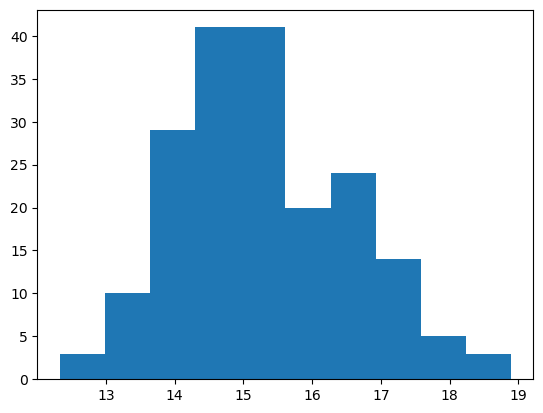

In [11]:
plt.hist(radDf['modelMag_r'])


In [12]:
### Populating Test set ###
outDir = 'Radial-Search-2_2024'
# if len(outDir) == len(radDf['objID']):
if len(outDir) > 10:
    print('Skipping populate')
else:
    for id, z, r, d in zip(radDf['objID'], radDf['z'], radDf['ra'], radDf['dec']):
        img_array = SkyServer.getJpegImgCutout(ra=r, dec=d, width=img_width, height=img_height, scale=0.1, 
                                     dataRelease=SkyServer_DataRelease)
        # print(f'{id}-label={labeler(z)}')
        outPicTemplate = f'{id}-label={labeler(z)}.png'
        
        img0 = Image.fromarray(img_array, 'RGB')
        img0.save(f'{outDir}/{outPicTemplate}')

Skipping populate


In [13]:
## Make outdir into a dataframe

testFiles = glob.glob(os.path.join(outDir, '*'))
testDf = pd.DataFrame({'files' : testFiles,
                       'labels': [int(filename[-5:-4]) for filename in testFiles]})


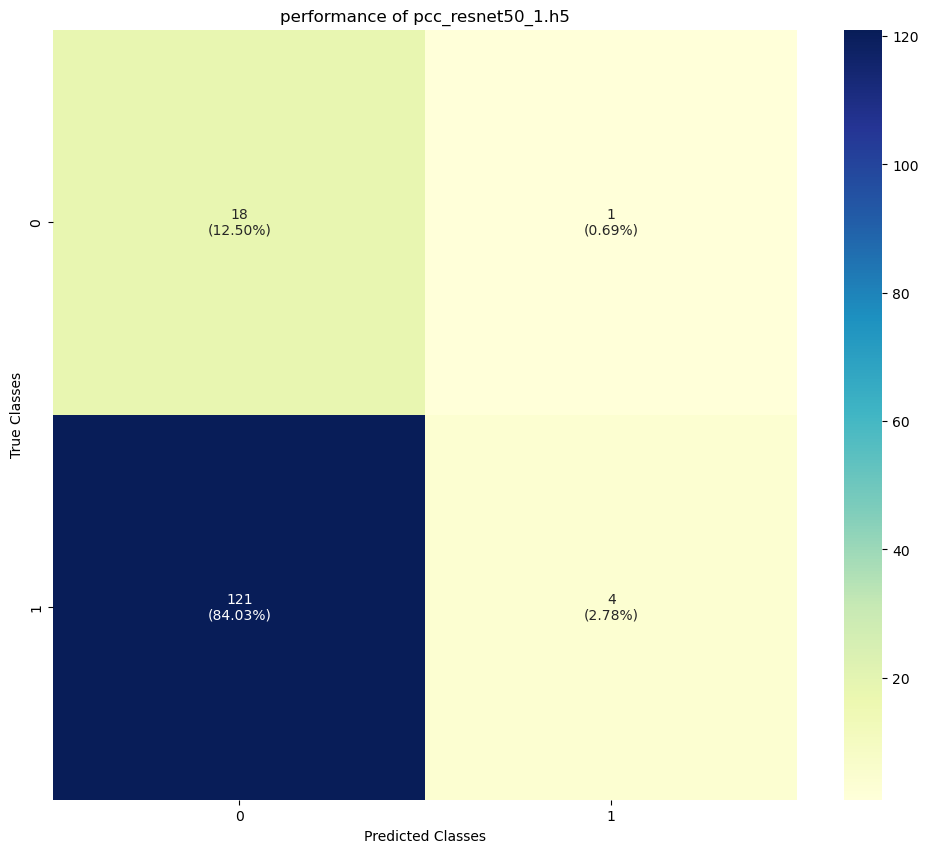

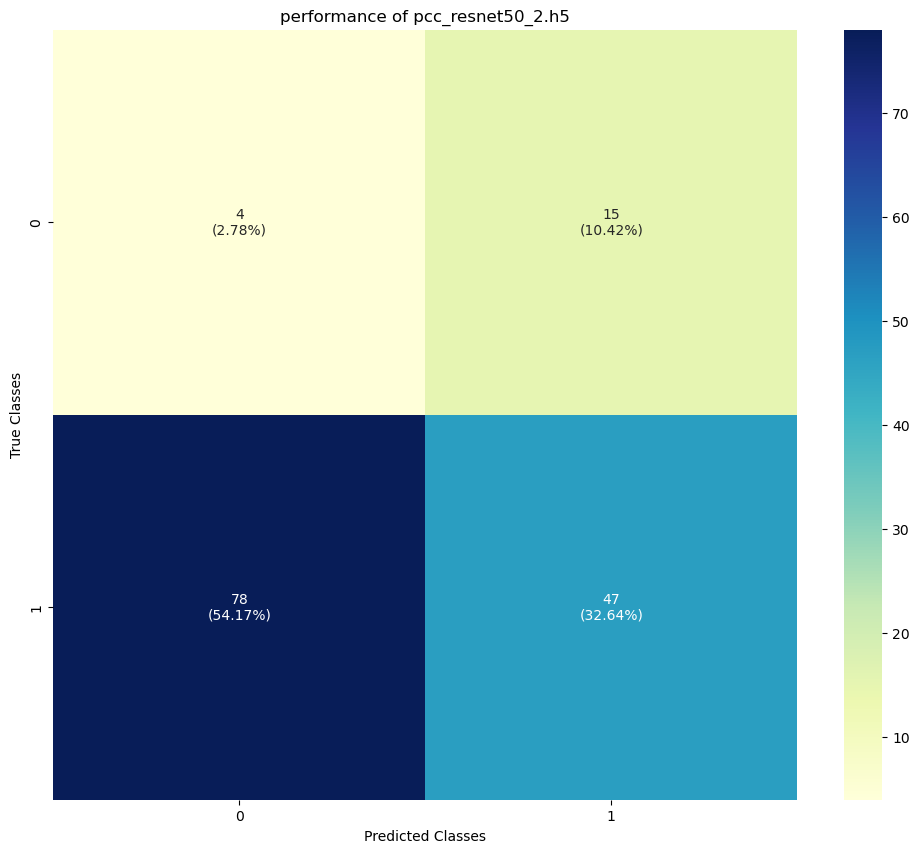

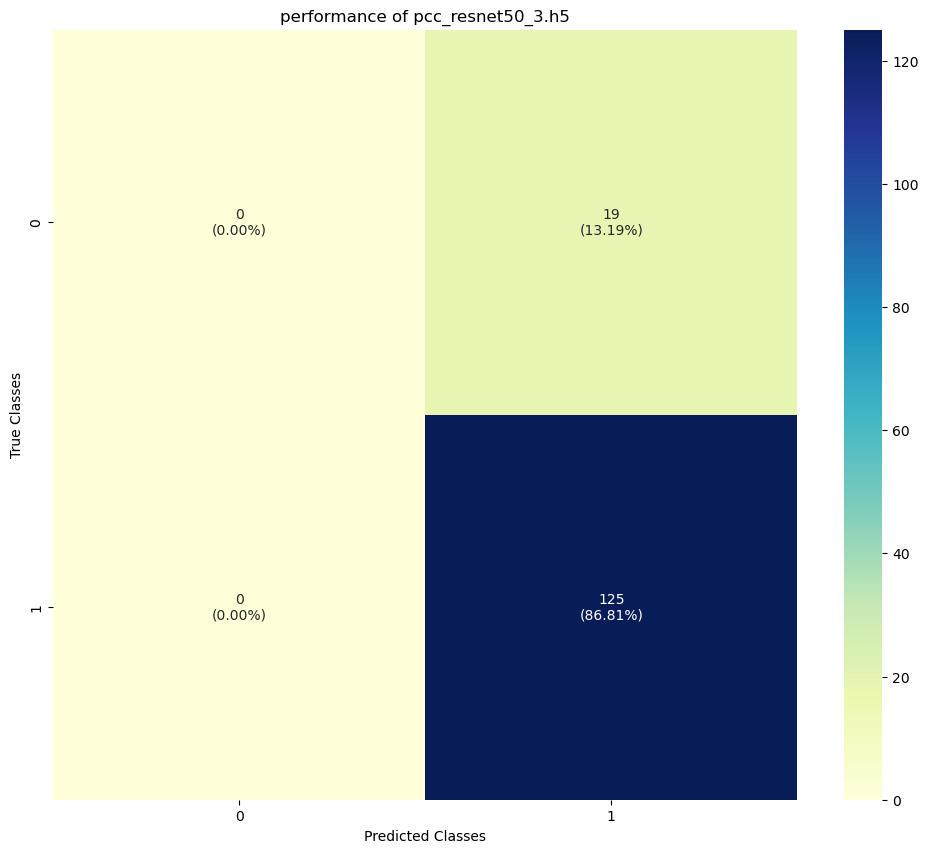

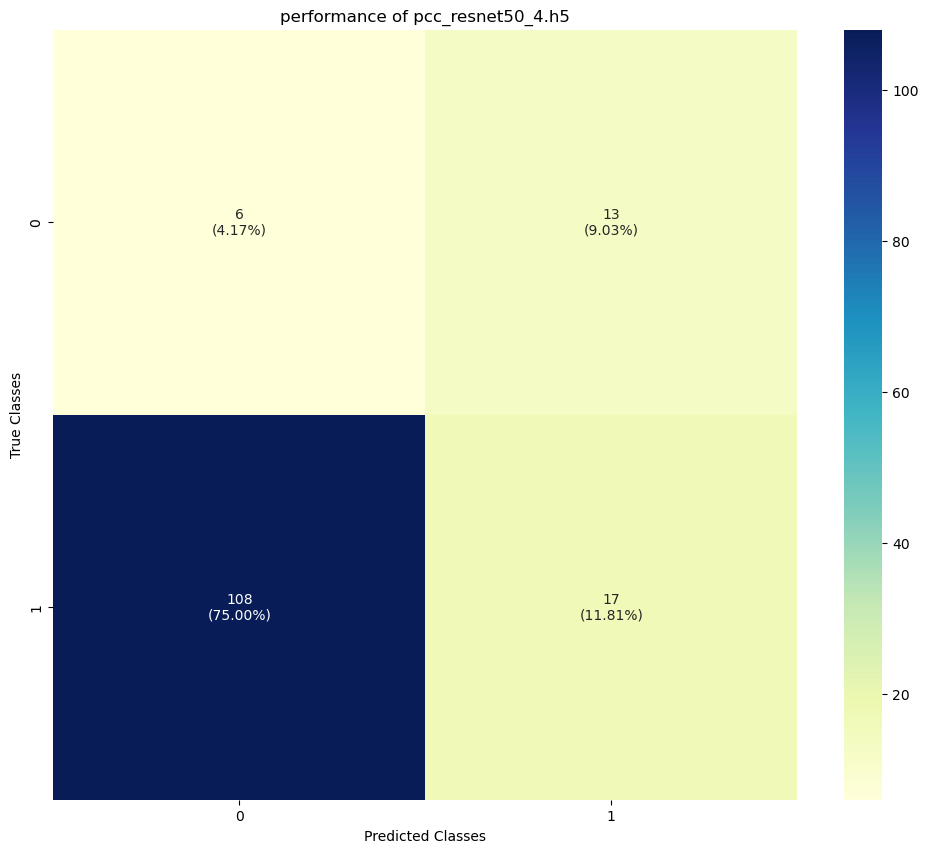

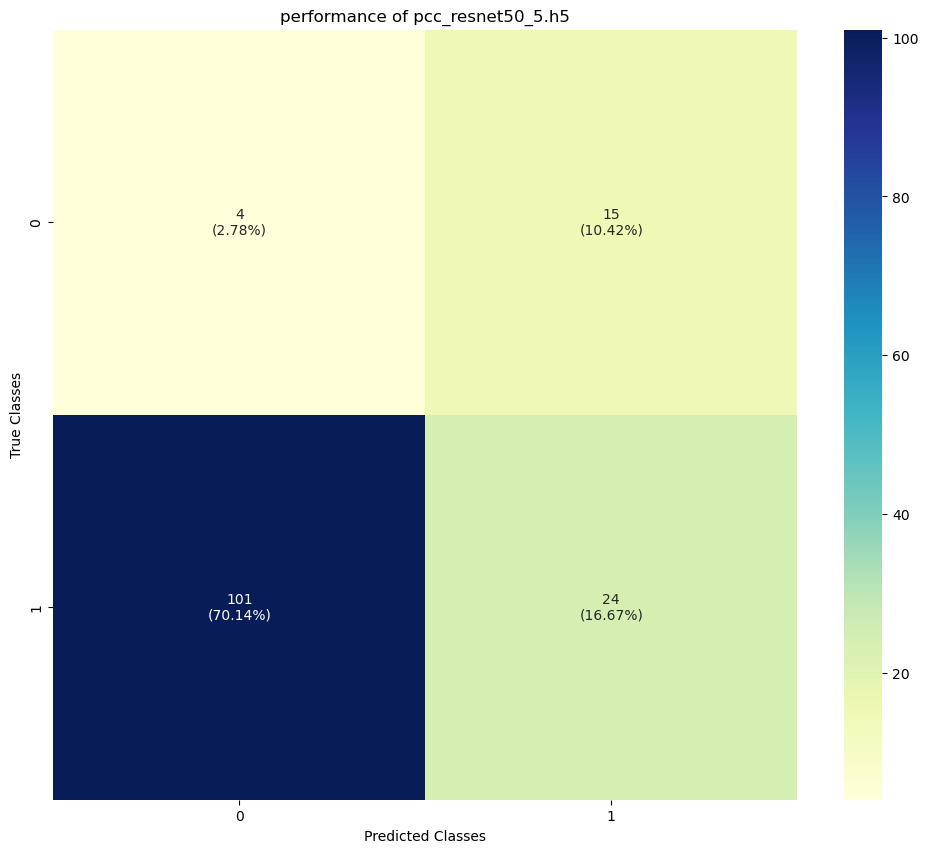

In [16]:
models = ['pcc_resnet50_1.h5','pcc_resnet50_2.h5','pcc_resnet50_3.h5','pcc_resnet50_4.h5','pcc_resnet50_5.h5']

# modelStr = 'pcc_resnet50_3.h5'
for modelStr in models:
    cnn_model = load_model(modelStr)
    cnn_model.load_weights
    # cnn_model.summary()
    # print(testFiles)
    predictions = []
    
    for ind, im in enumerate(testDf['files']):
        img = load_img(im, target_size=(img_width, img_height))
        x = img_to_array(img)
        ex = np.expand_dims(x, axis = 0)
        images = np.vstack([ex])
        
        pred = cnn_model.predict(ex)
        # print(pred)
        pred = np.argmax(pred, axis = 1)
        predictions.append(pred[0])
        # print(im, pred[0])
        # print(f'image is {im[-5:-4]}, model predicts {pred[0]}')
        
        # if ind > 4:
        #     break
    
    # cf_mtx = confusion_matrix(Y_true, y_pred)
    Y_true = testDf['labels'].to_list()[:len(predictions)]
    cf_mtx = confusion_matrix(Y_true, predictions)
    
    group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
    box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(2, 2)
    
    plt.figure(figsize = (12, 10))
    # # sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
    # #            cmap="YlGnBu", fmt="", annot=box_labels)
    sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="", annot=box_labels)
    # sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="")
    
    plt.title(f'performance of {modelStr}')
    plt.xlabel('Predicted Classes')
    plt.ylabel('True Classes')
    plt.savefig(f'{modelStr[:-3]}-performance.png')
    plt.show()

In [17]:
def checkBalance(df):
    all_labels = df['labels']
    all_labels = all_labels.tolist()
    balance = df['labels'].value_counts()
    print(balance)
    for i in range(len(balance)):
        print(f'{2*balance[i]*100/df.size:.2f} %')

checkBalance(testDf)

1    125
0     19
Name: labels, dtype: int64
13.19 %
86.81 %
